In [1]:
import sys
print(sys.executable)


C:\Users\LENOVO\anaconda3\envs\myenv\python.exe


In [2]:
# pip install opencv-python-headless

In [3]:
# pip install tensorflow

In [4]:
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import numpy as np
print(np.__version__)
print(tf.__version__)

1.26.4
2.17.0


In [6]:
#  Define Data Path
datapath = r"C:\Users\LENOVO\Downloads\Disaster_Dataset"


In [7]:
# shape of image:
import cv2
im = cv2.imread(r"C:\Users\LENOVO\Downloads\Disaster_Dataset\Drought\04_02_0039.png")
print(im.shape)

(400, 400, 3)


In [8]:
from PIL import Image
import os
import glob

def validate_and_fix_images(folder_path):
    for img_path in glob.glob(os.path.join(folder_path, '**/*'), recursive=True):
        if os.path.isfile(img_path):
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify the integrity of the file
                    img.seek(0)   # Reset file pointer
                    img = Image.open(img_path)
                    img.load()    # Load the image data
            except (OSError, Exception) as e:
                print('Problematic file:', img_path, 'Error:', e)
                os.remove(img_path)  # Optionally remove the corrupted file
                
# Replace with your dataset path
validate_and_fix_images(r"C:\Users\LENOVO\Downloads\Disaster_Dataset")


In [9]:
# Data Preprocessing and Loading

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img


# Create an instance of ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    validation_split=0.2   # Split data into training and validation sets
)

# Load training data
train_data = datagen.flow_from_directory(
    directory=r"C:\Users\LENOVO\Downloads\Disaster_Dataset",
    target_size=(224, 224),  # Resize images to the desired size
    batch_size=32,           # Define batch size
    class_mode='categorical',# For multi-class classification
    subset='training'        # Specify this as training data
)

# Load validation data
val_data = datagen.flow_from_directory(
    directory=r"C:\Users\LENOVO\Downloads\Disaster_Dataset",
    target_size=(224, 224),  # Resize images to the desired size
    batch_size=32,           # Define batch size
    class_mode='categorical',# For multi-class classification
    subset='validation'      # Specify this as validation data
)


Found 10848 images belonging to 12 classes.
Found 2707 images belonging to 12 classes.


In [11]:
print(train_data.class_indices)


{'Drought': 0, 'Earthquake': 1, 'Human_Damage': 2, 'Infrastructure': 3, 'Land_Slide': 4, 'Non_Damage_Buildings_Street': 5, 'Non_Damage_Wildlife_Forest': 6, 'Urban_Fire': 7, 'Water_Disaster': 8, 'Wild_Fire': 9, 'human': 10, 'sea': 11}


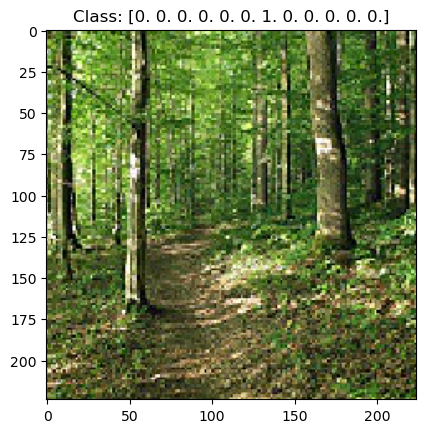

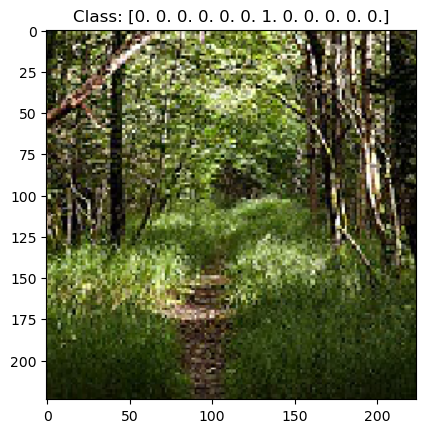

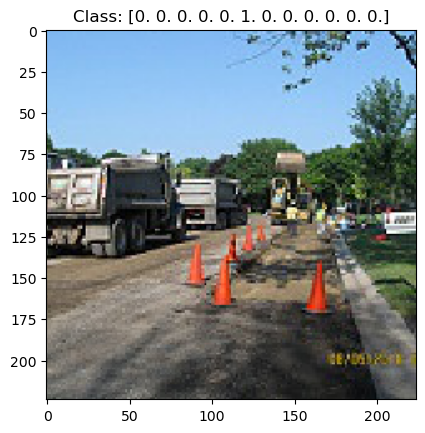

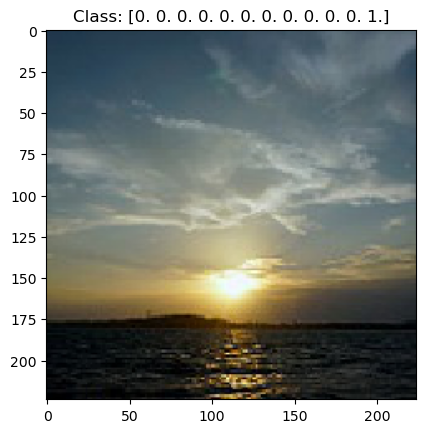

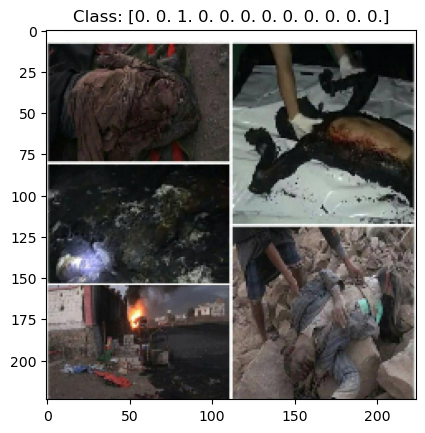

In [12]:
import matplotlib.pyplot as plt

# Get a batch of training data
images, labels = next(train_data)

# Plot the first 5 images
for i in range(5):
    plt.imshow(images[i])
    plt.title(f"Class: {labels[i]}")
    plt.show()


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Input layer and first convolutional block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fourth convolutional block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the last convolutional block
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(512, activation='relu'))

# Dropout layer to reduce overfitting
model.add(layers.Dropout(0.5))

# Output layer with softmax activation for multi-class classification
model.add(layers.Dense(12, activation='softmax'))

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           6,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,684,684 (36.94 MB)

 Trainable params: 9,684,684 (36.94 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [24]:
# Training the model without early stopping
# history = model.fit(
#     train_data,            # Training data generator
#     steps_per_epoch=train_data.samples // train_data.batch_size,  # Number of batches per epoch
#     epochs=20,             # Number of epochs to train the model
#     validation_data=val_data,  # Validation data generator
#     validation_steps=val_data.samples // val_data.batch_size,  # Number of validation batches per epoch
#     verbose=1              # Verbosity level (1 shows progress bar)
# )


In [16]:
# Training the model using early stopping

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training with early stopping
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=5,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/5


C:\Users\LENOVO\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


339/339 ━━━━━━━━━━━━━━━━━━━━ 240s 700ms/step - accuracy: 0.4988 - loss: 1.5597 - val_accuracy: 0.7143 - val_loss: 0.9013
Epoch 2/5
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7895 - val_loss: 0.7069
Epoch 3/5


C:\Users\LENOVO\anaconda3\envs\myenv\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


339/339 ━━━━━━━━━━━━━━━━━━━━ 885s 3s/step - accuracy: 0.7321 - loss: 0.8550 - val_accuracy: 0.7805 - val_loss: 0.6612
Epoch 4/5
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6842 - val_loss: 0.8173
Epoch 5/5
339/339 ━━━━━━━━━━━━━━━━━━━━ 249s 731ms/step - accuracy: 0.7954 - loss: 0.6160 - val_accuracy: 0.7812 - val_loss: 0.6633


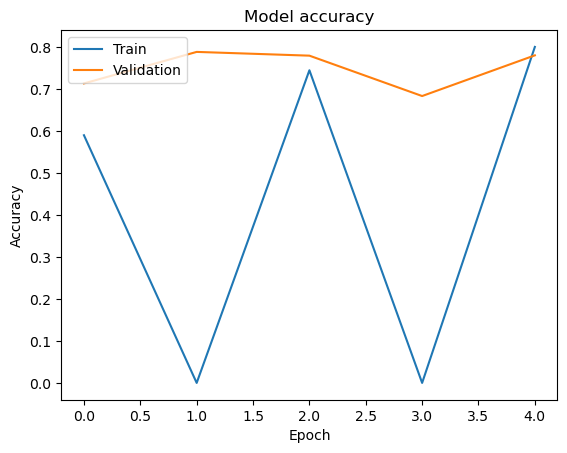

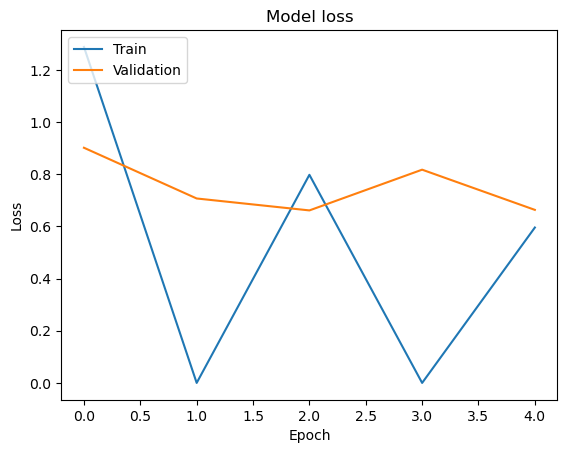

In [17]:
# visualizing training history:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [18]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_data, steps=val_data.samples // val_data.batch_size)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


84/84 ━━━━━━━━━━━━━━━━━━━━ 26s 304ms/step - accuracy: 0.7698 - loss: 0.6715
Validation Loss: 0.6651
Validation Accuracy: 0.7786


In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


85/85 ━━━━━━━━━━━━━━━━━━━━ 23s 267ms/step


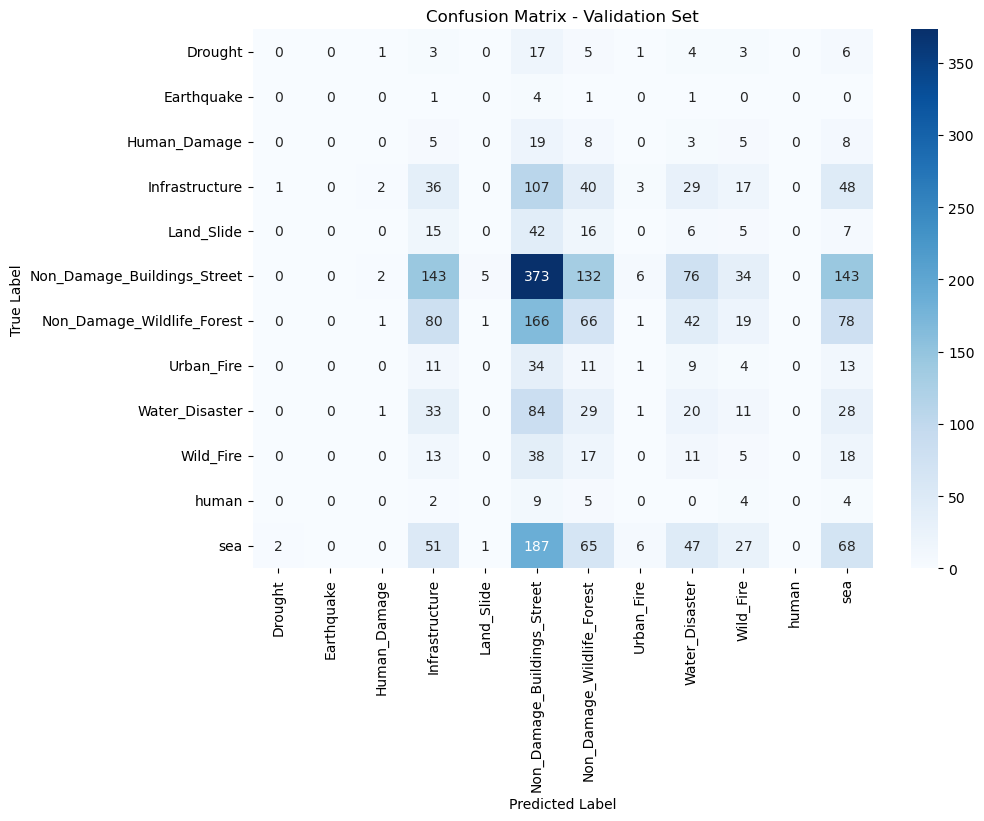

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions from the validation set
val_predictions = model.predict(val_data, steps=val_data.samples // val_data.batch_size + 1)
predicted_classes = np.argmax(val_predictions, axis=1)

# Get true labels from the validation set
true_classes = val_data.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=val_data.class_indices.keys(), 
            yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Validation Set')
plt.show()



In [21]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize

# Calculate and print classification report
report = classification_report(true_classes, predicted_classes, target_names=val_data.class_indices.keys())
print("Classification Report:\n", report)

# Binarize the true labels for multi-class ROC-AUC
binarized_labels = label_binarize(true_classes, classes=np.arange(len(val_data.class_indices)))
roc_auc = roc_auc_score(binarized_labels, val_predictions, multi_class='ovr')
print(f"ROC-AUC Score (Validation Set): {roc_auc:.4f}")

Classification Report:
                              precision    recall  f1-score   support

                    Drought       0.00      0.00      0.00        40
                 Earthquake       0.00      0.00      0.00         7
               Human_Damage       0.00      0.00      0.00        48
             Infrastructure       0.09      0.13      0.11       283
                 Land_Slide       0.00      0.00      0.00        91
Non_Damage_Buildings_Street       0.35      0.41      0.37       914
 Non_Damage_Wildlife_Forest       0.17      0.15      0.16       454
                 Urban_Fire       0.05      0.01      0.02        83
             Water_Disaster       0.08      0.10      0.09       207
                  Wild_Fire       0.04      0.05      0.04       102
                      human       0.00      0.00      0.00        24
                        sea       0.16      0.15      0.16       454

                   accuracy                           0.21      2707
        

C:\Users\LENOVO\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


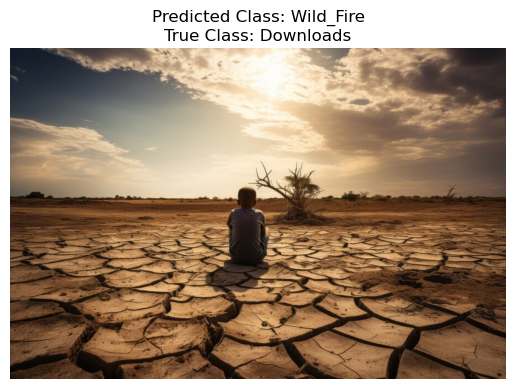

Prediction is correct: False


In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os


def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize if necessary
    return img_array

def predict_class(model, img_array, class_names):
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_class_name = class_names[predicted_class[0]]
    return predicted_class_name

def get_true_label(img_path, class_names):
    # Extract the true label from the directory structure
    # Assuming the directory structure is like: 'path/to/dataset/class_name/image.jpg'
    true_label = img_path.split(os.path.sep)[-2]
    return true_label

def show_image_with_prediction(img_path, predicted_class, true_class):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}\nTrue Class: {true_class}')
    plt.show()

def check_prediction(model, img_path, class_names):
    img_array = load_and_preprocess_image(img_path, target_size=(224, 224))
    predicted_class = predict_class(model, img_array, class_names)
    true_class = get_true_label(img_path, class_names)
    
    # Display the result
    show_image_with_prediction(img_path, predicted_class, true_class)
    
    # Check if the prediction is correct
    is_correct = predicted_class == true_class
    print(f'Prediction is correct: {is_correct}')

# Path to the image you want to classify
image_path = r"C:\Users\LENOVO\Downloads\drought.jpg"

# Get class names from the validation data generator
class_names = list(val_data.class_indices.keys())

# Check the prediction
check_prediction(model, image_path, class_names)


### Integration

In [23]:
# pip install pandas h5py


In [24]:
model.save('disaster_classification_model.h5')